YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


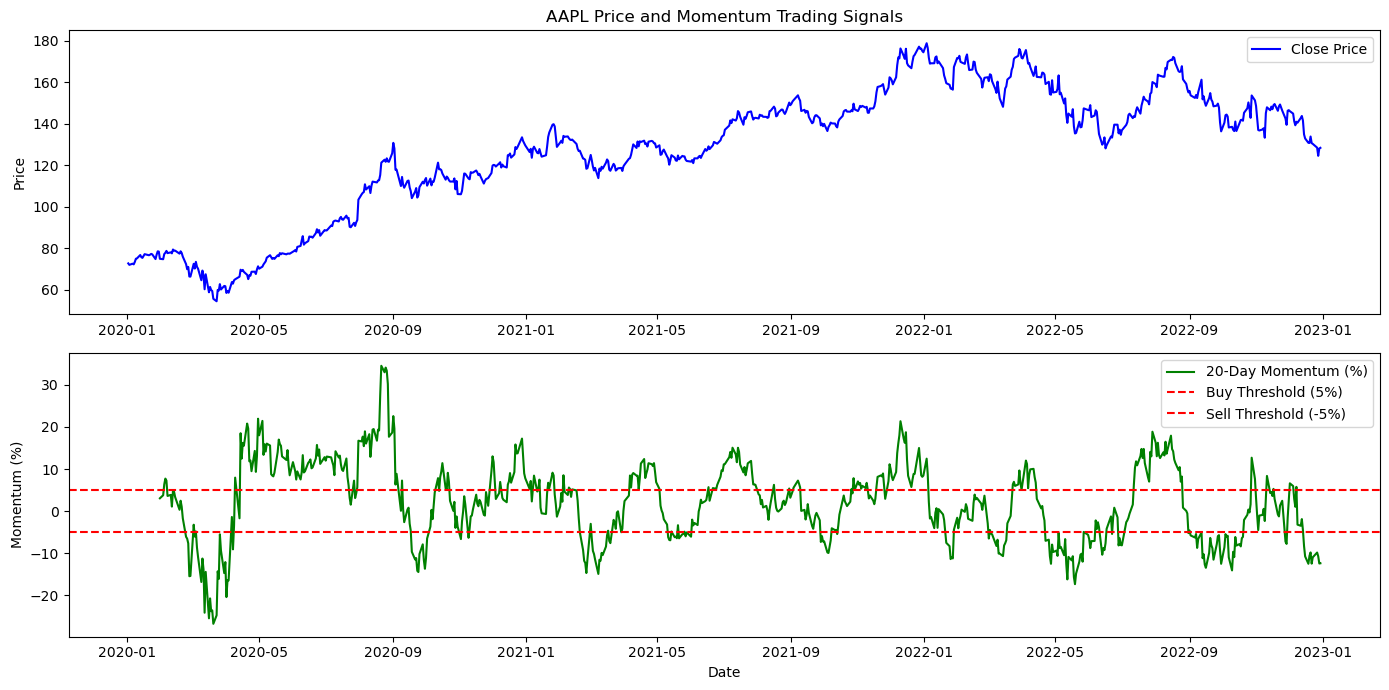

Price            Close   Momentum Signal
Ticker            AAPL                  
Date                                    
2022-12-23  130.344467 -10.971595     -1
2022-12-27  128.535538  -9.839119     -1
2022-12-28  124.591377 -10.717576     -1
2022-12-29  128.120346 -12.443427     -1
2022-12-30  128.436646 -12.392969     -1


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical stock data (for example, Apple Inc.)
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# Calculate momentum: percentage change over 20 trading days.
# This gives the percent increase (or decrease) in price from 20 days ago.
data['Momentum'] = data['Close'].pct_change(periods=20) * 100

# Generate simple trading signals:
# Signal 1 = Buy if momentum > 5%, -1 = Sell if momentum < -5%, else 0 (Hold)
data['Signal'] = 0
data.loc[data['Momentum'] > 5, 'Signal'] = 1
data.loc[data['Momentum'] < -5, 'Signal'] = -1

# Plot the stock's close price and its momentum indicator
plt.figure(figsize=(14, 7))

ax1 = plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label="Close Price", color='blue')
plt.title(f"{ticker} Price and Momentum Trading Signals")
plt.ylabel("Price")
plt.legend()

ax2 = plt.subplot(2, 1, 2, sharex=ax1)
plt.plot(data.index, data['Momentum'], label="20-Day Momentum (%)", color='green')
plt.axhline(5, color='blue', linestyle='--', label="Buy Threshold (5%)")
plt.axhline(-5, color='red', linestyle='--', label="Sell Threshold (-5%)")
plt.xlabel("Date")
plt.ylabel("Momentum (%)")
plt.legend()

plt.tight_layout()
plt.show()

# Display the last few rows of data for review
print(data[['Close', 'Momentum', 'Signal']].tail())
